In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

In [2]:
# построим ROC-кривую
def plot_roc_curve(y_test, y_pred):
    fper, tper, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fper, tper)
    plt.plot(fper, tper, color='green', label=f'ROC-кривая (area = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC AUC (area = {roc_auc:.3f})')
    plt.legend(loc="lower right")
    plt.show()

In [5]:
def quality_report(prediction, actual):
    print((f" Accuracy: {accuracy_score(prediction, actual):.3f}\n \
Precision: {precision_score(prediction, actual):.3f}\n \
Recall: {recall_score(prediction, actual):.3f}\n \
f1_score: {f1_score(prediction, actual):.3f}"))

In [6]:
data = pd.read_excel('nocat_data.xlsx')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['status'], axis=1), data['status'], test_size=0.30, random_state=42, stratify=data['status']
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((71150, 9), (30494, 9), (71150,), (30494,))

In [8]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
log_reg = LogisticRegression(solver = 'lbfgs')
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [10]:
print("Train quality:")
quality_report(log_reg.predict(X_train_scaled), y_train)
print("\nTest quality:")
quality_report(log_reg.predict(X_test_scaled), y_test)

Train quality:
 Accuracy: 0.783
 Precision: 0.049
 Recall: 0.479
 f1_score: 0.089

Test quality:
 Accuracy: 0.783
 Precision: 0.052
 Recall: 0.480
 f1_score: 0.093


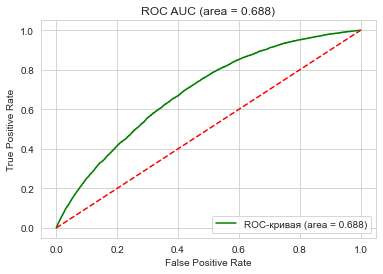

In [16]:
y_pred = log_reg.predict_proba(X_test_scaled)[:,1]
plot_roc_curve(y_test, y_pred)

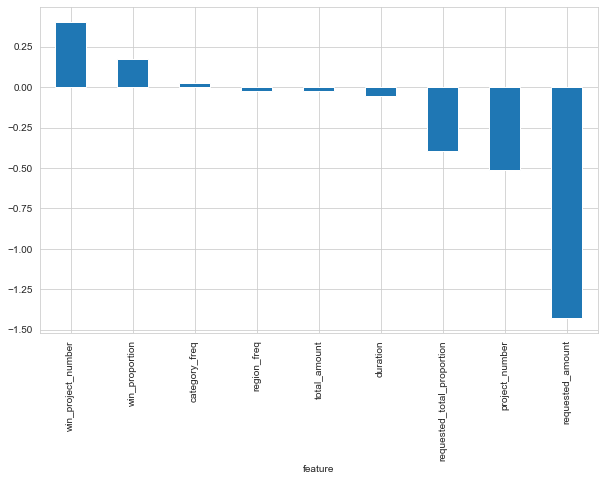

In [17]:
featureImportance = pd.DataFrame({"feature":data.drop(columns='status').columns.values ,
                                  "importance": log_reg.coef_[0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind='bar', figsize=(10, 6));

In [20]:
df1 = data[data['status'] == 0].head(22000)

In [21]:
df1 = data[data['status'] == 0].head(22000)
# 22k
df2 = data[data['status'] ==1]
balanced_data = pd.concat([df1, df2])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    balanced_data.drop(['status'], axis=1), balanced_data['status'], test_size=0.30, random_state=42, stratify=balanced_data['status']
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((30774, 9), (13189, 9), (30774,), (13189,))

In [25]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
from sklearn.linear_model import LogisticRegressionCV

log_reg3 = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=5000,Cs=100, scoring='accuracy')
log_reg3.fit(X_train_scaled, y_train)

LogisticRegressionCV(Cs=100, cv=5, max_iter=5000, scoring='accuracy')

In [27]:
print("Train quality:")
quality_report(log_reg3.predict(X_train_scaled), y_train)
print("\nTest quality:")
quality_report(log_reg3.predict(X_test_scaled), y_test)

Train quality:
 Accuracy: 0.735
 Precision: 0.655
 Recall: 0.780
 f1_score: 0.712

Test quality:
 Accuracy: 0.734
 Precision: 0.658
 Recall: 0.776
 f1_score: 0.712


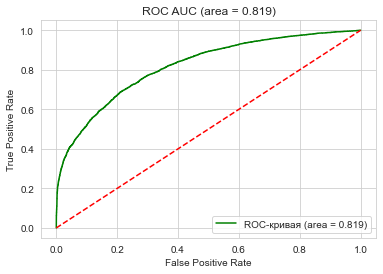

In [29]:
y_pred = log_reg3.predict_proba(X_test_scaled)[:,1]
plot_roc_curve(y_test, y_pred)

In [56]:
data = pd.read_excel('one_hot_data.xlsx')

In [57]:
df1 = data[data['status'] == 0].head(22000)
# 22k
df2 = data[data['status'] ==1]
balanced_data = pd.concat([df1, df2])

In [58]:
balanced_data

,requested_amount,total_amount,status,duration,project_number,win_project_number,win_proportion,requested_total_proportion,region_freq,"Защита прав и свобод человека и гражданина, в том числе защита прав заключенных",...,охрана окружающей среды и защита животных,"поддержка молодежных проектов, реализация которых охватывает виды деятельности, предусмотренные статьей 31.1 федерального закона от 12 января 1996 г. № 7-фз «о некоммерческих организациях»",поддержка проектов в области культуры и искусства,"поддержка проектов в области науки, образования, просвещения","поддержка семьи, материнства, отцовства и детства",развитие институтов гражданского общества,развитие общественной дипломатии и поддержка соотечественников,сохранение исторической памяти,"социальное обслуживание, социальная поддержка и защита граждан",укрепление межнационального и межрелигиозного согласия
3,5233932.0,7715932.0,0,364,0,0,0.000000,0.678328,0.139,0,...,0,0,0,0,0,1,0,0,0,0
5,1337424.0,1337424.0,0,239,0,0,0.000000,1.000000,0.007,0,...,0,1,0,0,0,0,0,0,0,0
7,1867840.0,2622640.0,0,349,0,0,0.000000,0.712198,0.021,0,...,0,0,0,0,0,0,0,0,0,0
8,2996510.0,2996510.0,0,294,0,0,0.000000,1.000000,0.032,0,...,0,0,0,0,0,0,0,0,1,0
10,7967650.0,7967650.0,0,455,0,0,0.000000,1.000000,0.041,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101608,4200341.0,7641989.0,1,241,7,3,0.428571,0.549640,0.016,0,...,0,0,0,0,0,0,0,0,0,0
101609,1156204.2,2001828.6,1,331,3,1,0.333333,0.577574,0.005,0,...,0,0,0,0,0,0,0,0,0,0
101625,4934650.0,7706890.0,1,484,2,2,1.000000,0.640291,0.004,0,...,0,0,0,0,0,0,0,0,0,0
101640,740571.9,1047124.9,1,120,0,0,0.000000,0.707243,0.139,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    balanced_data.drop(['status'], axis=1), balanced_data['status'], test_size=0.30, random_state=42, stratify=balanced_data['status']
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((30774, 34), (13189, 34), (30774,), (13189,))

In [65]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [68]:
from sklearn.linear_model import LogisticRegressionCV

log_reg4 = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=5000,Cs=100, scoring='f1')
log_reg4.fit(X_train_scaled, y_train)

LogisticRegressionCV(Cs=100, cv=5, max_iter=5000, scoring='f1')

In [69]:
print("Train quality:")
quality_report(log_reg4.predict(X_train_scaled), y_train)
print("\nTest quality:")
quality_report(log_reg4.predict(X_test_scaled), y_test)

Train quality:
 Accuracy: 0.743
 Precision: 0.659
 Recall: 0.791
 f1_score: 0.719

Test quality:
 Accuracy: 0.741
 Precision: 0.658
 Recall: 0.789
 f1_score: 0.718


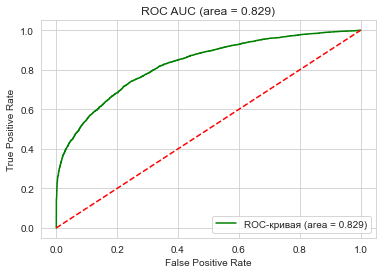

In [71]:
y_pred = log_reg4.predict_proba(X_test_scaled)[:,1]
plot_roc_curve(y_test, y_pred)

In [52]:
from sklearn.linear_model import LogisticRegressionCV

log_reg5 = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=5000,Cs=100, scoring='f1')
log_reg5.fit(X_train_scaled, y_train)

LogisticRegressionCV(Cs=100, cv=5, max_iter=5000, scoring='f1')

In [53]:
print("Train quality:")
quality_report(log_reg5.predict(X_train_scaled), y_train)
print("\nTest quality:")
quality_report(log_reg5.predict(X_test_scaled), y_test)

Train quality:
 Accuracy: 0.735
 Precision: 0.655
 Recall: 0.780
 f1_score: 0.712

Test quality:
 Accuracy: 0.734
 Precision: 0.658
 Recall: 0.776
 f1_score: 0.712


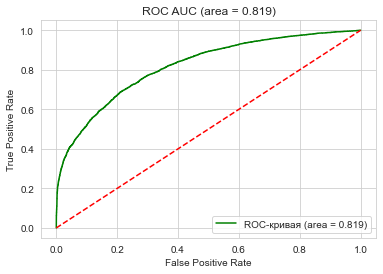

In [55]:
y_pred = log_reg5.predict_proba(X_test_scaled)[:,1]
plot_roc_curve(y_test, y_pred)

In [ ]:
data = pd.read_excel('one_hot_data.xlsx')

In [ ]:
df1 = data[data['status'] == 0].head(22000)

In [ ]:
# 22k
df2 = data[data['status'] ==1]
balanced_data = pd.concat([df1, df2])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    balanced_data.drop(['status'], axis=1), balanced_data['status'], test_size=0.30, random_state=42, stratify=balanced_data['status']
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

log_reg3 = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=5000,Cs=100, scoring='accuracy')
log_reg3.fit(X_train_scaled, y_train)

In [ ]:
print("Train quality:")
quality_report(log_reg3.predict(X_train_scaled), y_train)
print("\nTest quality:")
quality_report(log_reg3.predict(X_test_scaled), y_test)

In [ ]:
y_pred = log_reg3.predict(X_test_scaled)
plot_roc_curve(y_test, y_pred)

In [ ]:
data

In [ ]:
X_train_scaled

In [72]:
values = ['1', '-3', 'N/A']
def f(val):
    try:
        x = int(val)
        return True
    except ValueError:
        return False
    
vals = list(filter(f, values))
print(vals)

['1', '-3']


In [75]:
filter(f, values)